In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)

In [3]:
def read(fieldminMaxFile):
    with open(fieldminMaxFile,"r") as fp:
        comment=fp.readline()
        header=fp.readline()
    header=header[1:-1].split()
    indexs_processor=[]
    for i,name in enumerate(header):
        if header[i]=="processor":
            indexs_processor.append(i)
    indexs_processor.reverse()  

    data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
    data=data.drop(indexs_processor,axis=1)
    data.rename(columns=lambda x:header[x],inplace=True)
    return data

In [4]:
data_consider=read("./consider_fieldMinMax.dat")
data_consider.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
1,0.000003,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
2,0.000004,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
3,0.000006,T,772.9978,(4.350000e-05 4.450000e-05 5.000000e-07),773.0022,(2.350000e-05 8.450000e-05 5.000000e-07)
4,0.000009,T,772.9976,(6.550000e-05 6.350000e-05 5.000000e-07),773.0077,(2.350000e-05 8.450000e-05 5.000000e-07)


In [5]:
data_notConsider=read("./notConsider_fieldMinMax.dat")
data_notConsider.head()

,Time,field,min,location(min),max,location(max)
0,0.000001,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
1,0.000003,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
2,0.000004,T,772.9980,(4.350000e-05 4.450000e-05 5.000000e-07),773.0000,(4.445000e-04 4.550000e-05 5.000000e-07)
3,0.000006,T,772.9981,(4.350000e-05 4.450000e-05 5.000000e-07),773.0027,(2.350000e-05 8.450000e-05 5.000000e-07)
4,0.000009,T,772.9981,(6.550000e-05 6.350000e-05 5.000000e-07),773.0087,(2.350000e-05 8.450000e-05 5.000000e-07)


In [6]:
Tref=773

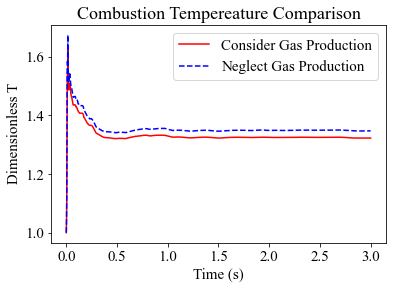

In [9]:
fig, ax = plt.subplots()
ax.plot(data_consider["Time"],data_consider["max"]/Tref,lineStyle="-",color="r",label="Consider Gas Production")
ax.plot(data_notConsider["Time"],data_notConsider["max"]/Tref,lineStyle="--",color="b",label="Neglect Gas Production")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Comparison")
ax.legend(loc="upper right")

In [12]:
data_notConsider.tail()

,Time,field,min,location(min),max,location(max)
30016,2.9996,T,773.0,(0.000000e+00 5.000000e-07 5.000000e-07),1041.555,(2.485000e-04 2.850000e-05 5.000000e-07)
30017,2.9997,T,773.0,(0.000000e+00 5.000000e-07 5.000000e-07),1041.555,(2.485000e-04 2.850000e-05 5.000000e-07)
30018,2.9998,T,773.0,(0.000000e+00 5.000000e-07 5.000000e-07),1041.555,(2.485000e-04 2.850000e-05 5.000000e-07)
30019,2.9999,T,773.0,(0.000000e+00 5.000000e-07 5.000000e-07),1041.556,(2.485000e-04 2.850000e-05 5.000000e-07)
30020,3.0000,T,773.0,(0.000000e+00 5.000000e-07 5.000000e-07),1041.556,(2.485000e-04 2.850000e-05 5.000000e-07)
